In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from CoPhaser import utils

import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
DATA = "../data/"

In [4]:
vasa_results = pickle.load(open(DATA + "vasa_res.pkl", "rb"))
tricycle_results = pd.read_csv(DATA + "tricycle_results_normalized.csv")

In [5]:
vasa_results

{'embedding': array([[-1.7479428, 11.770438 ],
        [12.535977 , 11.360967 ],
        [ 2.099037 , 12.784089 ],
        ...,
        [ 3.0999982, 14.994775 ],
        [ 9.211832 ,  2.7688165],
        [12.046578 , 11.078278 ]], dtype=float32),
 'phases': 0        1.353041
 1        2.813054
 2        2.478801
 3       -3.133023
 4        2.018315
            ...   
 46117   -0.826039
 46118    1.380422
 46120   -0.822513
 46121    0.450558
 46123   -2.350754
 Name: inferred_theta, Length: 38913, dtype: float32,
 'author_labels': 0          NaN
 1          NaN
 2         True
 3          NaN
 4         True
          ...  
 46117    False
 46118     True
 46120    False
 46121      NaN
 46123     True
 Name: S-phase, Length: 38913, dtype: object,
 'JS_res': {'Our Method': [0.8359352851362121],
  'UMAP': [0.473721231194144],
  'Cyclop': [0.12634239067230416],
  'Velo\nCycle': [0.07434213701886656],
  'random': 0.03631005697217307},
 'f_space': array([[-0.4340178 ,  1.1402501 ],
      

In [6]:
vasa_results["author_labels"]

0          NaN
1          NaN
2         True
3          NaN
4         True
         ...  
46117    False
46118     True
46120    False
46121      NaN
46123     True
Name: S-phase, Length: 38913, dtype: object

<Axes: xlabel='tricycleEmbedding.PC1', ylabel='tricycleEmbedding.PC2'>

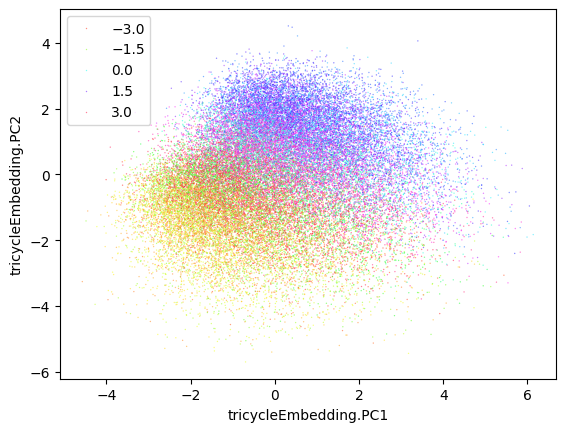

In [7]:
sns.scatterplot(
    x=tricycle_results["tricycleEmbedding.PC1"],
    y=tricycle_results["tricycleEmbedding.PC2"],
    hue=vasa_results["phases"].values,
    s=1,
    alpha=0.5,
    palette="hsv",
)

In [8]:
tricycle_phase = np.arctan2(
    tricycle_results["tricycleEmbedding.PC2"], tricycle_results["tricycleEmbedding.PC1"]
)

<Axes: xlabel='None', ylabel='Count'>

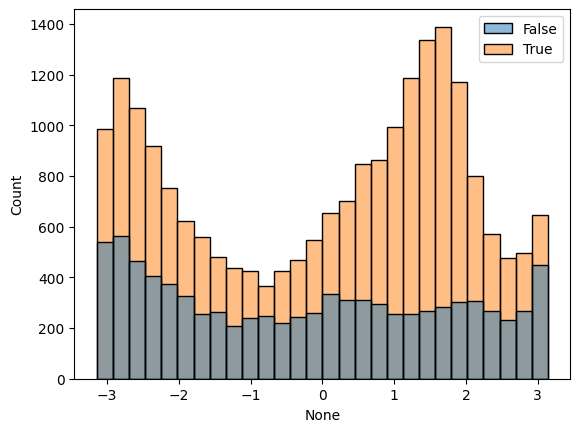

In [9]:
sns.histplot(
    x=tricycle_phase,
    hue=vasa_results["author_labels"].values,
)

<Axes: ylabel='Count'>

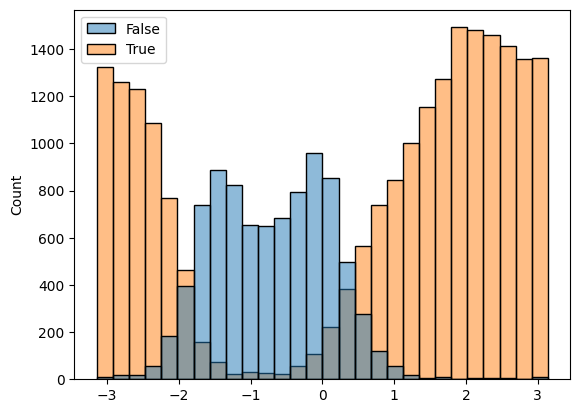

In [10]:
sns.histplot(
    x=vasa_results["phases"].values,
    hue=vasa_results["author_labels"].values,
)

In [11]:
utils.get_jensenshannon_raw(tricycle_phase, vasa_results["author_labels"].values)

0.1515010546695972

In [14]:
vasa_results["JS_res"]["Tricycle"] = [
    utils.get_jensenshannon_raw(tricycle_phase, vasa_results["author_labels"].values)
]
vasa_results["tricycle_phase"] = tricycle_phase

In [ ]:
# with open("../data/vasa_res.pkl", "wb") as f:
#     pickle.dump(vasa_results, f)